# Tugas Kecil 1 IF3270 Pembelajaran Mesin - Eksplorasi library `sklearn`

Anggota kelompok:
1. Firizky Ardiansyah (13520095)
1. Alifia Rahmah (13520122)

## Membaca dataset (load dataset)

1. Gunakanlah `sklearn.datasets` untuk membaca dataset `breast-cancer`.
Membagi dataset menjadi 80% data training dan 20% data testing.


In [ ]:
# import library
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import pickle

In [ ]:
# util

score_col = ['accuracy score', 'precision score', 'recall score', 'f1 score']
learning = ["DTL", "ID3", "KMeans", "Logistic Regression", "Neural Network", "SVM"]

def metric(actual, predicted):
    data = [[]]
    data[0].append(accuracy_score(actual, predicted))
    data[0].append(precision_score(actual, predicted))
    data[0].append(recall_score(actual, predicted))
    data[0].append(f1_score(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    df = pd.DataFrame(data, columns=score_col)
    cm_df = pd.DataFrame(cm, columns=['1', '0'], index=["1", "0"])
    return df, cm_df

def all_score(data):
  df = pd.concat(data)
  df.index = learning
  return df

In [ ]:
# load dataset
cancer = load_breast_cancer()
data = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
target = pd.DataFrame(cancer.target, columns=["target"])
target

,target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [ ]:
data.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [ ]:
target.head(10)

,target
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [ ]:
from sklearn.model_selection import train_test_split
# membagi dataset menjadi 80% training dan 20% testing
datatrain, datatest, targettrain, targettest = train_test_split(data, target, test_size=0.2, train_size=0.8, shuffle=True, random_state=3000)

In [ ]:
datatrain

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
11,15.78,17.89,103.60,781.0,0.09710,0.12920,0.099540,0.066060,0.1842,0.06082,...,20.42,27.28,136.50,1299.0,0.13960,0.56090,0.39650,0.18100,0.3792,0.10480
191,12.77,21.41,82.02,507.4,0.08749,0.06601,0.031120,0.028640,0.1694,0.06287,...,13.75,23.50,89.04,579.5,0.09388,0.08978,0.05186,0.04773,0.2179,0.06871
281,11.74,14.02,74.24,427.3,0.07813,0.04340,0.022450,0.027630,0.2101,0.06113,...,13.31,18.26,84.70,533.7,0.10360,0.08500,0.06735,0.08290,0.3101,0.06688
334,12.30,19.02,77.88,464.4,0.08313,0.04202,0.007756,0.008535,0.1539,0.05945,...,13.35,28.46,84.53,544.3,0.12220,0.09052,0.03619,0.03983,0.2554,0.07207
118,15.78,22.91,105.70,782.6,0.11550,0.17520,0.213300,0.094790,0.2096,0.07331,...,20.19,30.50,130.30,1272.0,0.18550,0.49250,0.73560,0.20340,0.3274,0.12520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,13.90,16.62,88.97,599.4,0.06828,0.05319,0.022240,0.013390,0.1813,0.05536,...,15.14,21.80,101.20,718.9,0.09384,0.20060,0.13840,0.06222,0.2679,0.07698
78,20.18,23.97,143.70,1245.0,0.12860,0.34540,0.375400,0.160400,0.2906,0.08142,...,23.37,31.72,170.30,1623.0,0.16390,0.61640,0.76810,0.25080,0.5440,0.09964
26,14.58,21.53,97.41,644.8,0.10540,0.18680,0.142500,0.087830,0.2252,0.06924,...,17.62,33.21,122.40,896.9,0.15250,0.66430,0.55390,0.27010,0.4264,0.12750
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.317400,0.147400,0.2149,0.06879,...,24.29,29.41,179.10,1819.0,0.14070,0.41860,0.65990,0.25420,0.2929,0.09873


In [ ]:
targettrain

,target
11,0
191,1
281,1
334,1
118,0
...,...
477,1
78,0
26,0
563,0


In [ ]:
datatest

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
109,11.340,21.26,72.48,396.5,0.08759,0.06575,0.05133,0.018990,0.1487,0.06529,...,13.010,29.15,83.99,518.1,0.1699,0.2196,0.31200,0.08278,0.2829,0.08832
541,14.470,24.99,95.81,656.4,0.08837,0.12300,0.10090,0.038900,0.1872,0.06341,...,16.220,31.73,113.50,808.9,0.1340,0.4202,0.40400,0.12050,0.3187,0.10230
515,11.340,18.61,72.76,391.2,0.10490,0.08499,0.04302,0.025940,0.1927,0.06211,...,12.470,23.03,79.15,478.6,0.1483,0.1574,0.16240,0.08542,0.3060,0.06783
313,11.540,10.72,73.73,409.1,0.08597,0.05969,0.01367,0.008907,0.1833,0.06100,...,12.340,12.87,81.23,467.8,0.1092,0.1626,0.08324,0.04715,0.3390,0.07434
364,13.400,16.95,85.48,552.4,0.07937,0.05696,0.02181,0.014730,0.1650,0.05701,...,14.730,21.70,93.76,663.5,0.1213,0.1676,0.13640,0.06987,0.2741,0.07582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,16.130,20.68,108.10,798.8,0.11700,0.20220,0.17220,0.102800,0.2164,0.07356,...,20.960,31.48,136.80,1315.0,0.1789,0.4233,0.47840,0.20730,0.3706,0.11420
458,13.000,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.017620,0.1667,0.05449,...,14.340,31.88,91.06,628.5,0.1218,0.1093,0.04462,0.05921,0.2306,0.06291
525,8.571,13.10,54.53,221.3,0.10360,0.07632,0.02565,0.015100,0.1678,0.07126,...,9.473,18.45,63.30,275.6,0.1641,0.2235,0.17540,0.08512,0.2983,0.10490
70,18.940,21.31,123.60,1130.0,0.09009,0.10290,0.10800,0.079510,0.1582,0.05461,...,24.860,26.58,165.90,1866.0,0.1193,0.2336,0.26870,0.17890,0.2551,0.06589


In [ ]:
targettest

,target
109,1
541,1
515,1
313,1
364,1
...,...
17,0
458,1
525,1
70,0


## Pembelajaran dan Hasil Prediksi Algoritma ML

2. Dengan memanggil method: `fit(datatrain,targettrain)` atau
`fit(datatrain)` untuk semua data training.
Anda dapat melakukan sedikit eksperimen untuk setting parameter method `fit()`.
Tuliskan parameter yang digunakan.

  Catatan:
  - Jika diperlukan encoding data kategorikal, gunakanlah library `LabelEncoder`.
  - Khusus untuk DecisionTreeClassifier, tampilkan model pohon hasil Decision
  Tree dengan method `export_text`.

3. Simpan model hasil pembelajaran dengan pustaka `pickle`.

4. Melakukan proses prediction dengan load model yang sudah disimpan
memanfaatkan pustaka pickle, kemudian memanggil method `predict(datatest)`.
Lakukan evaluasi hasil prediksi dengan menggunakan metric: Accuracy, Precision,
Recall dan F1; serta confusion_matrix hasil prediksi model.

### Decision Tree Classifier
<hr>
DTL adalah algoritma pembelajaran mesin yang digunakan dalam pengklasifikasian data dengan membuat pohon keputusan (decision tree) berdasarkan fitur-fitur yang tersedia pada data. DTL merupakan metode pembentukan pohon keputusan yang menggunakan strategi top-down, dimulai dari node akar dan melakukan pemisahan data pada setiap percabangan hingga mencapai daun sebagai hasil klasifikasi.

http://scikit-learn.org/stable/modules/tree.html

In [ ]:
from sklearn import tree

In [ ]:
# training
dtl_model = tree.DecisionTreeClassifier(criterion="entropy")
dtl_model.fit(datatrain, targettrain)

DecisionTreeClassifier(criterion='entropy')

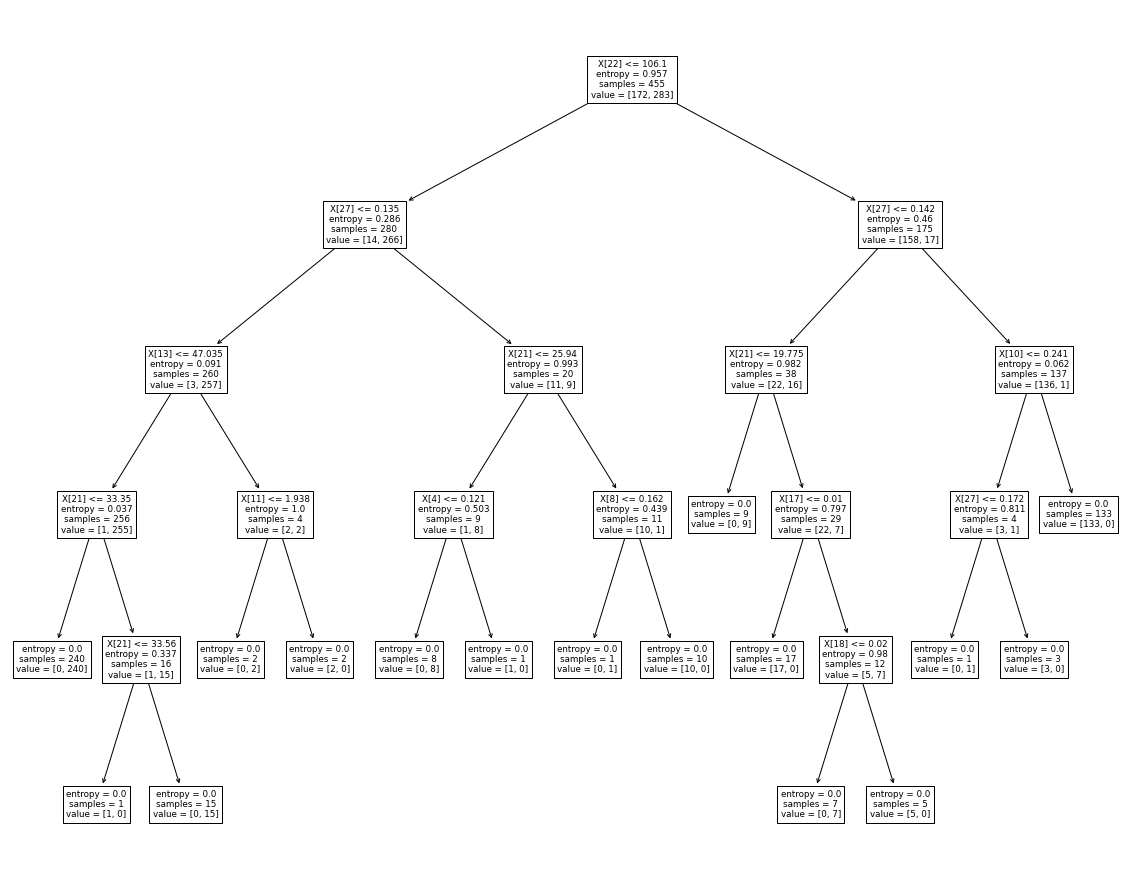

In [ ]:
# plot model
plt.figure(figsize=(20, 16))
treeplot = tree.plot_tree(dtl_model)
plt.show()

In [ ]:
# print dalam bentuk text
r = tree.export_text(decision_tree=dtl_model)
print(r)

|--- feature_22 <= 106.10
|   |--- feature_27 <= 0.14
|   |   |--- feature_13 <= 47.03
|   |   |   |--- feature_21 <= 33.35
|   |   |   |   |--- class: 1
|   |   |   |--- feature_21 >  33.35
|   |   |   |   |--- feature_21 <= 33.56
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_21 >  33.56
|   |   |   |   |   |--- class: 1
|   |   |--- feature_13 >  47.03
|   |   |   |--- feature_11 <= 1.94
|   |   |   |   |--- class: 1
|   |   |   |--- feature_11 >  1.94
|   |   |   |   |--- class: 0
|   |--- feature_27 >  0.14
|   |   |--- feature_21 <= 25.94
|   |   |   |--- feature_4 <= 0.12
|   |   |   |   |--- class: 1
|   |   |   |--- feature_4 >  0.12
|   |   |   |   |--- class: 0
|   |   |--- feature_21 >  25.94
|   |   |   |--- feature_8 <= 0.16
|   |   |   |   |--- class: 1
|   |   |   |--- feature_8 >  0.16
|   |   |   |   |--- class: 0
|--- feature_22 >  106.10
|   |--- feature_27 <= 0.14
|   |   |--- feature_21 <= 19.77
|   |   |   |--- class: 1
|   |   |--- feature_21 >  

In [ ]:
# Simpan model ke dalam pickle
pickle.dump(dtl_model, open('dtl.pkl', 'wb'))

In [ ]:
# load model dari pickle
pickled_tree_model = pickle.load(open('dtl.pkl', 'rb'))

In [ ]:
# prediksi model
targettest_pred_dtl = pickled_tree_model.predict(datatest)
targettest_pred_dtl

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1])

In [ ]:
# evaluasi
score_dtl, matrix_confusion_dtl = metric(targettest, targettest_pred_dtl) 

In [ ]:
score_dtl

,accuracy score,precision score,recall score,f1 score
0,0.912281,0.957143,0.905405,0.930556


In [ ]:
matrix_confusion_dtl

,1,0
1,37,3
0,7,67


### ID3 Estimator
<hr>

ID3 adalah algoritma pembelajaran mesin yang digunakan dalam pengklasifikasian data dengan membuat pohon keputusan (decision tree) berdasarkan fitur-fitur yang tersedia pada data. Dibandingkan DTL, algoritma pembelajaran mesin yang digunakan dalam pengklasifikasian data dengan membuat pohon keputusan (decision tree) berdasarkan fitur-fitur yang tersedia pada data. Meskipun keduanya memiliki prinsip yang sama, namun terdapat perbedaan dalam proses pembentukan pohon keputusan.

https://github.com/svaante/decision-tree-id3

In [ ]:
# dependency
!pip install decision-tree-id3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from id3 import Id3Estimator
from id3 import export_graphviz
import id3.export

In [ ]:
# training
id3_model = Id3Estimator(prune=True, gain_ratio=True)
id3_model.fit(datatrain, targettrain)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Id3Estimator(gain_ratio=True, prune=True)

In [ ]:
# Simpan model ke dalam pickle
pickle.dump(id3_model, open('id3.pkl', 'wb'))

In [ ]:
# load model dari pickle
pickled_id3_model = pickle.load(open('id3.pkl', 'rb'))

In [ ]:
# prediksi model
targettest_pred_id3 = pickled_id3_model.predict(datatest)
targettest_pred_id3

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0])

In [ ]:
# evaluasi
score_id3, matrix_confusion_id3 = metric(targettest, targettest_pred_id3)

In [ ]:
score_id3

,accuracy score,precision score,recall score,f1 score
0,0.877193,0.941176,0.864865,0.901408


In [ ]:
matrix_confusion_id3

,1,0
1,36,4
0,10,64


### K Means
<hr>

KMeans adalah algoritma pembelajaran mesin dalam kategori clustering atau pengelompokan data, dimana data dikelompokkan dalam kelompok-kelompok yang memiliki kemiripan atau kesamaan berdasarkan jarak antar data dan jumlah kluster yang ditentukan sebelumnya.


https://scikit-learn.org/0.19/modules/generated/sklearn.cluster.KMeans.html

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# training
kmeans_model = KMeans(n_clusters=2, random_state=3300)
kmeans_model.fit(datatrain, targettrain)

KMeans(n_clusters=2, random_state=3300)

In [ ]:
# simpan model ke dalam pickle
pickle.dump(kmeans_model, open('kmeans.pkl', 'wb'))

In [ ]:
# load model dari pickle
pickled_id3_model = pickle.load(open('kmeans.pkl', 'rb'))

In [ ]:
# prediksi model
targettest_pred_kmeans = pickled_id3_model.predict(datatest)
targettest_pred_kmeans

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1], dtype=int32)

In [ ]:
# evaluasi
score_kmeans, matrix_confusion_kmeans = metric(targettest, targettest_pred_kmeans)

In [ ]:
score_kmeans

,accuracy score,precision score,recall score,f1 score
0,0.868421,0.831461,1.0,0.907975


In [ ]:
matrix_confusion_kmeans

,1,0
1,25,15
0,0,74


### Logistic Regression
<hr>

Logistic Regression adalah salah satu algoritma klasifikasi linear yang umum digunakan dalam pemodelan prediktif. Algoritma ini mencoba memodelkan hubungan antara variabel dependen (kelas target) dan satu atau lebih variabel independen (fitur) dengan menggunakan fungsi logistik.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg_model = LogisticRegression(max_iter=10000)
logreg_model.fit(datatrain, targettrain['target'])

LogisticRegression(max_iter=10000)

In [ ]:
# simpan model ke dalam pickle
pickle.dump(logreg_model, open('logreg.pkl', 'wb'))

In [ ]:
# load model dari pickle
pickled_logreg = pickle.load(open('logreg.pkl', 'rb'))

In [ ]:
# prediksi model
targettest_pred_logreg = pickled_logreg.predict(datatest)

In [ ]:
# evaluasi
score_logreg, matrix_confusion_logreg = metric(targettest, targettest_pred_logreg)

In [ ]:
score_logreg

,accuracy score,precision score,recall score,f1 score
0,0.95614,0.972603,0.959459,0.965986


In [ ]:
matrix_confusion_logreg

,1,0
1,38,2
0,3,71


### Neural Network
<hr>

Neural Network adalah algoritma pembelajaran mesin yang terinspirasi dari struktur dan fungsi sistem saraf manusia. Algoritma ini terdiri dari beberapa lapisan neuron buatan yang saling terhubung dan mampu belajar secara mandiri melalui proses iteratif dan penyesuaian bobot yang disebut training.

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
# training
nn_model = MLPClassifier(random_state=1, max_iter=300)
nn_model.fit(datatrain, targettrain['target'])

MLPClassifier(max_iter=300, random_state=1)

In [ ]:
# simpan model
pickle.dump(nn_model, open('nn.pkl', 'wb'))

In [ ]:
# load model
pickled_nn = pickle.load(open('nn.pkl', 'rb'))

In [ ]:
# prediksi model
targettest_pred_nn = pickled_nn.predict(datatest)

In [ ]:
# evaluasi
score_nn, matrix_confusion_nn = metric(targettest, targettest_pred_nn)

In [ ]:
score_nn

,accuracy score,precision score,recall score,f1 score
0,0.912281,0.890244,0.986486,0.935897


In [ ]:
matrix_confusion_nn

,1,0
1,31,9
0,1,73


### SVM
<hr>
SVM (Support Vector Machine) adalah algoritma pembelajaran mesin yang digunakan dalam pengklasifikasian data dengan mencari hyperplane terbaik yang dapat memisahkan dua kelas data secara optimal di ruang fitur.

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [ ]:
# training
svm_model = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm_model.fit(datatrain, targettrain['target'])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [ ]:
# simpan model
pickle.dump(svm_model, open('svm.pkl', 'wb'))

In [ ]:
# load model
pickled_svm = pickle.load(open('svm.pkl', 'rb'))

In [ ]:
# prediksi model
targettest_pred_svm = pickled_svm.predict(datatest)

In [ ]:
# evaluasi
score_svm, matrix_confusion_svm = metric(targettest, targettest_pred_svm)

In [ ]:
score_svm

,accuracy score,precision score,recall score,f1 score
0,0.964912,0.972973,0.972973,0.972973


In [ ]:
matrix_confusion_svm

,1,0
1,38,2
0,2,72


### Catatan
<hr></hr>

Pada Logistic Regression, `sklearn` sempat mengeluarkan warning `ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT`. Hal ini disebabkan karena proses iterasi regresi telah mencapai maksimal namun hasil training belum konvergen.

Solusi dari warning ini adalah dengan menambah argumen pada pemanggilan `LogisticRegression` untuk meningkatkan jumlah iterasi dari default value-nya yaitu 100.

```py
LogisticRegression(max_iter=10000)
```


## Analisis hasil metrik evaluasi 

5. Analisis hasil metrik evaluasi yang sudah diperoleh untuk semua algoritma
pembelajaran, dalam bentuk perbandingan nilai dan penjelasan singkat mengenai
hasil tersebut.

In [ ]:
data_score = [
    score_dtl,
    score_id3,
    score_kmeans,
    score_logreg,
    score_nn,
    score_svm
]

scores = all_score(data_score)
scores

,accuracy score,precision score,recall score,f1 score
DTL,0.912281,0.957143,0.905405,0.930556
ID3,0.877193,0.941176,0.864865,0.901408
KMeans,0.868421,0.831461,1.000000,0.907975
Logistic Regression,0.956140,0.972603,0.959459,0.965986
Neural Network,0.912281,0.890244,0.986486,0.935897
SVM,0.964912,0.972973,0.972973,0.972973


Berdasarkan data tersebut, dapat dilihat bahwa SVM memiliki nilai akurasi tertinggi, serta nilai precision, recall, dan f1-score yang sangat baik, menunjukkan bahwa SVM cocok untuk digunakan dalam kasus-kasus di mana keakuratan prediksi sangat penting. 

Selain itu, Logistic Regression juga memiliki kinerja yang sangat baik, dengan nilai akurasi, precision, recall, dan f1-score yang sangat dekat dengan SVM. Logistic Regression cocok untuk digunakan dalam kasus-kasus di mana keakuratan prediksi sangat penting.

Model Logistic Regression dan SVM memiliki precision score dan accuracy score yang lebih tinggi dibanding yang lain. Model dengan precision dan akurasi yang tinggi cocok digunakan dalam kasus-kasus di mana kesalahan false positive (FP) dan false negative (FN) harus dihindari

DTL dan ID3 juga memiliki kinerja yang baik, dengan nilai f1-score dan precision score yang sangat dekat dengan Logistic Regression dan SVM. Namun, DTL memiliki nilai recall yang sedikit lebih tinggi daripada ID3, sehingga ID3 mungkin lebih cocok untuk digunakan dalam kasus-kasus di mana penting untuk memaksimalkan nilai recall.

KMeans dan Neural Network memiliki kinerja yang sedikit lebih rendah daripada algoritma lainnya dalam hal precision score. Namun, KMeans dan Neural Network memiliki nilai recall yang sangat tinggi, artinya model tersebut dapat mengidentifikasi sebagian besar data positif (True Positive) secara benar. Oleh karena itu, model dengan recall yang tinggi cocok digunakan dalam kasus-kasus di mana kesalahan false negative (FN) yang besar dapat berdampak buruk.

Secara keseluruhan, berdasarkan data tersebut, dapat disimpulkan bahwa SVM dan Logistic Regression memiliki kinerja terbaik dalam hal nilai metrik evaluasi yang digunakan, sedangkan DTL dan ID3 juga memiliki kinerja yang baik dan mungkin cocok untuk digunakan dalam kasus-kasus tertentu. KMeans dan Neural Network perlu ditingkatkan atau disesuaikan untuk meningkatkan kinerja mereka.

## K-fold cross validation 
6. Lakukan k-fold cross validation (dengan k=10), dengan fungsi cross_validate pada
algoritme DecisionTreeClassifier saja untuk dataset breast cancer. Tampilkan hasil
akurasi dan F1 score dari 10-fold cross validation. Bandingkan dan analisis hasil
pembandingan dengan akurasi dan F1 score DecisionTreeClassifier pada hasil di
butir (4).

K-fold cross validation (CV) adalah teknik evaluasi model yang berguna untuk mengukur kinerja suatu algoritma dengan membagi dataset menjadi k subset (dalam kasus ini k=10)

In [ ]:
from sklearn.model_selection import cross_validate, KFold

In [ ]:
cv = KFold(n_splits=10, random_state=3000, shuffle=True)
score_kfold = cross_validate(dtl_model, data, target, cv = cv, scoring=['accuracy', 'f1'])
score_kfold

kfold_vs_dtl = [[score_dtl.loc[0]['accuracy score'], score_dtl.loc[0]['f1 score']], [score_kfold['test_accuracy'].mean(), score_kfold['test_accuracy'].mean()]]
kfold_vs_dtl_index = ['DTL', 'KFold']
kfold_vs_dtl_df = pd.DataFrame(kfold_vs_dtl, index = kfold_vs_dtl_index, columns=['accuracy score', 'f1 score'])
kfold_vs_dtl_df

,accuracy score,f1 score
DTL,0.912281,0.930556
KFold,0.929793,0.929793


Pada model DTL menggunakan KFold ditemukan hasil accuracy score dan f1 score sedikit lebih baik dibandingkan DTL tanpa KFold. Hal tersebut dapat menunjukkan bahwa model yang dihasilkan dari cross-validation lebih baik dalam mempelajari pola-pola yang ada di dataset dan dapat lebih baik dalam memprediksi data baru. KFold menggunakan *splitting* dataset secara berulang-ulang sehingga menghindari *overfitting*, hal tersebut bisa menjadi salah satu alasan mengapa accuracy score dan f1 score lebih besar dari DTL tanpa KFold.

Meski secara kasar DTL dengan KFold dan DTL tanpa KFold dapat dilihat perbandingannya, sebenarnya KFold adalah suatu cara menguji model yang sudah ada. Sehingga perbandingan accuracy score dan f1 score dari DTL dengan KFold dan DTL tanpa KFold secara umum tidak menunjukkan apa-apa karena keduanya bukan sesuatu yang perlu dibandingkan.